# The World Happiness Report



The World Happiness Report is a publication of the Sustainable Development Solutions Network, powered by the Gallup World Poll data.

The Report is supported by The Ernesto Illy Foundation, illycaffè, Davines Group, Unilever’s largest ice cream brand Wall’s, The Blue Chip Foundation, The William, Jeff, and Jennifer Gross Family Foundation, The Happier Way Foundation, and The Regenerative Society Foundation.

The World Happiness Report was written by a group of independent experts acting in their personal capacities. Any views expressed in this report do not necessarily reflect the views of any organization, agency or program of the United Nations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#### we could drop Happiness Ranking because it is directly proportional to Happiness Score

In [3]:
df.drop('Happiness Rank',axis=1,inplace=True)

## Checking for null values

In [4]:
df.isnull().sum().any()

False

There are no null values in the dataset

## Understanding Columns and performing EDA

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

#### About Columns:
    1. Country:
        Represents 158 countries in the world.
    2. Region:
        Represents the division of countries based on the region
    3. Happiness Score:
        It is a score that represents how happy the country is.
    4. Economy (GDP per Capita):
        It is a measures of country's economic output per person and is calculated by dividing the GDP of a country by its population.
    5. Health (Life Expectancy):
        Healthy Life Expectancy is the average number of years that a newborn can expect to live in “full health” — in other words, not hampered by disabling illnesses or injuries.
    6. Freedom:
        Freedom of choice describes an individual’s opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.
    7. Trust (Government Corruption):
        The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995, which ranks countries “by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.”
    8. Generosity:
        is defined as the residual of regressing the national average of responses to the question, “Have you donated money to a charity in past months?” on GDP capita.

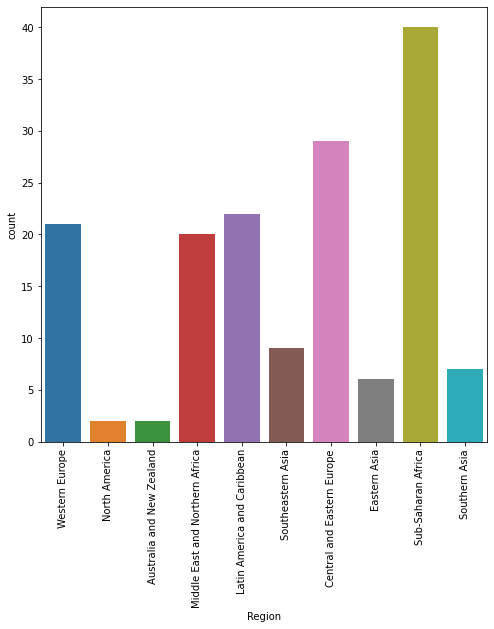

In [6]:
plt.figure(figsize=(8,8))
sns.countplot(df['Region'])
plt.xticks(rotation=90)
plt.show()

From the above graph we can clearly see that Sub-Saharan region has the highest number of countries in it and ANZ region has the least followed by NA

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

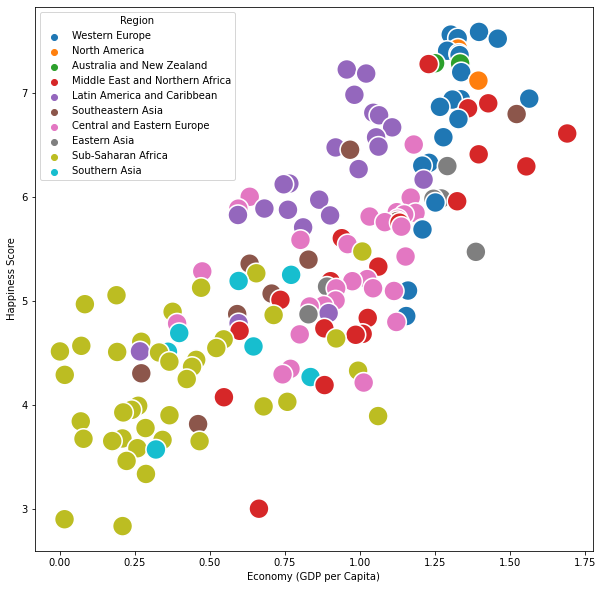

In [7]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Economy (GDP per Capita)', y = 'Happiness Score',hue='Region',data=df,s=400)

From the above graph, we can clearly see that the countries in Western Europe,North America and Australia & New Zealand have some of the highest GDP and rank among the happiest counties.
Countries in Sub-Saharan Africa and Southern Asia have some of the lowest GDP and the Happiness Rank is also on the lower side.
Middle East and North African region seems to have the most scattered GDP

In [8]:
reg_economy = df.pivot_table(values='Economy (GDP per Capita)',index='Region',aggfunc=['count','mean'])
reg_economy

,count,mean
,Economy (GDP per Capita),Economy (GDP per Capita)
Region,,
Australia and New Zealand,2,1.291880
Central and Eastern Europe,29,0.942438
Eastern Asia,6,1.151780
Latin America and Caribbean,22,0.876815
Middle East and Northern Africa,20,1.066974
North America,2,1.360400
Southeastern Asia,9,0.789054
Southern Asia,7,0.560486


<Figure size 864x1080 with 0 Axes>

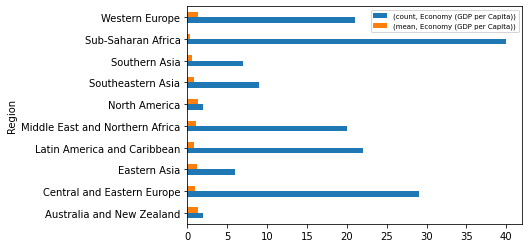

In [9]:
plt.figure(figsize=(12,15))
reg_economy.plot(kind='barh')
plt.legend(title=' ')
plt.legend(fontsize=7)

From the above graph we can see that North America, Australia and New Zealand and Western Europe have the highest average GDP, where as Sub-Saharan Africa	has the highest number of countries contributing but has the lowest avg. GDP 

In [10]:
wrld_gdp = df.pivot_table(values='Economy (GDP per Capita)',index='Region',aggfunc=sum)
wrld_gdp

,Economy (GDP per Capita)
Region,
Australia and New Zealand,2.58376
Central and Eastern Europe,27.33071
Eastern Asia,6.91068
Latin America and Caribbean,19.28994
Middle East and Northern Africa,21.33947
North America,2.72080
Southeastern Asia,7.10149
Southern Asia,3.92340
Sub-Saharan Africa,15.21892


(-1.25, 1.25, -1.25, 1.25)

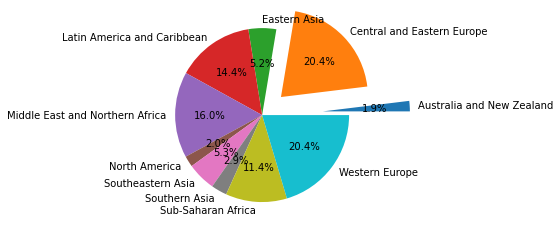

In [11]:
explode = [0.7,0.3,0,0,0,0,0,0,0,0]
wrld_gdp.plot.pie(subplots=True,autopct='%1.1f%%',explode=explode)
plt.legend().set_visible(False)
plt.axis('off')

From the above graph we can see that Central & Eastern Europe contributes the highest to the world GDP and Australia and New Zealand the least

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

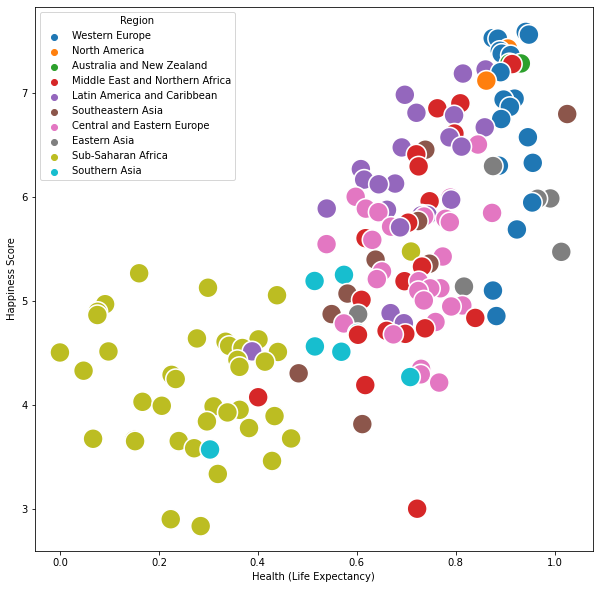

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Health (Life Expectancy)', y = 'Happiness Score',hue='Region',data=df,s=400)

From the above graph we can see that te Sub -Saharan Africa has the lowest life expectancy and ranks lower in happiness score, on the other hand the countries in Western Europe,North America and Australia & New Zealand have higher Life Expectancy and higher is the Happiness Score

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

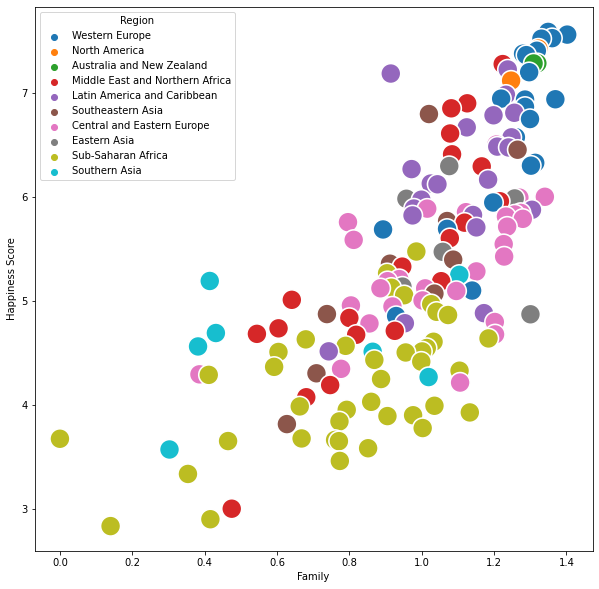

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Family', y = 'Happiness Score',hue='Region',data=df,s=400)

Sub- Saharan Africa and Southern Asia seems to have the lowest Family score and are among th lowest ranked countries in Happiness Score, where as Western Europe,North America and Australia & New Zealand have higher Family Score and are higher in the Happiness Score

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

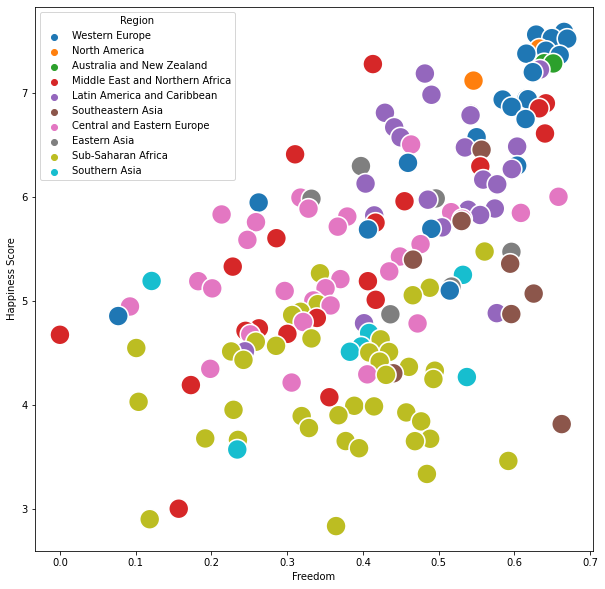

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Freedom', y = 'Happiness Score',hue='Region',data=df,s=400)

Western Europe and Australia and New Zealand seems to have the countries with highest freedom

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

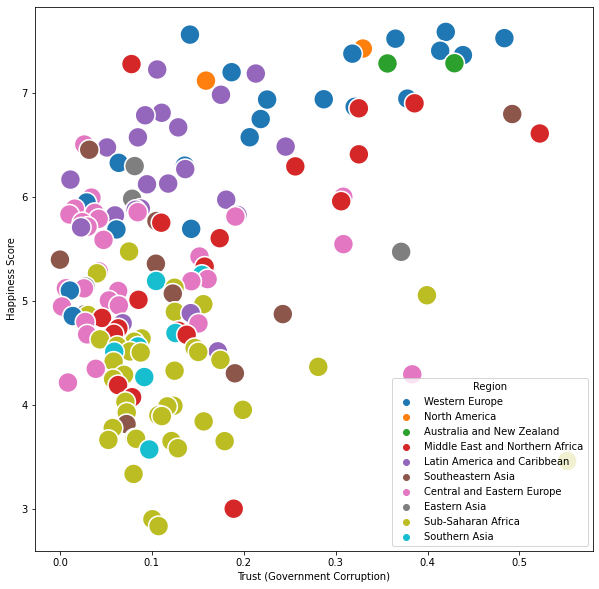

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Trust (Government Corruption)', y = 'Happiness Score',hue='Region',data=df,s=400)

Sub- Saharan Africa,Latin American and Caribbean,Central and Eastern European ,Southern Asia countries seems to have the least trust in the Government, where as Western Europe and Australia and New Zealand seems to have the countries with highest trust in Goverment

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

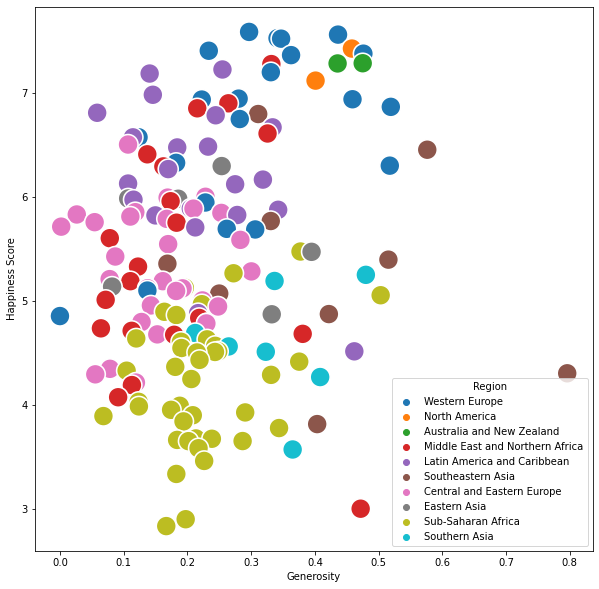

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Generosity', y = 'Happiness Score',hue='Region',data=df,s=400)

Generosity Score seems to be the lowest among the Central and Eastern Europe 

## Correlations

In [17]:
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

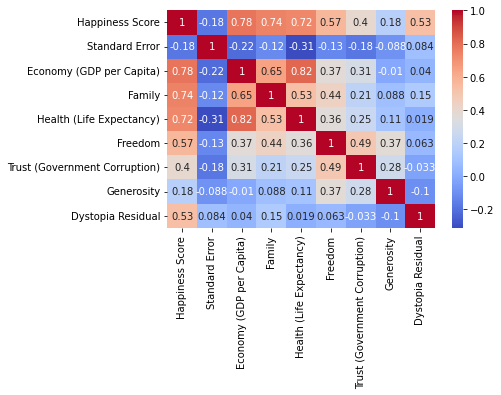

In [18]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

Standard Error with -0.177254 has a slight negitive correlation with Happiness score, rest all have a positive correlation.
Economy (GDP per Capita) with 78% has a very strong correlation followed by Family with 74% and Health (Life Expectancy) with 72%.
Freedom with 57%, Dystopia Residual with 53% and Trust (Government Corruption) with 40 % have strong correlation.
Generosity with 18% has the second weakest correlation

Strongest Correlation = Economy (GDP per Capita)
Weakest Correlation = Standard Error	

## Checking for Data Type

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(2)
memory usage: 13.7+ KB


we see that we have 2 data types which are object type and will have to be taken care off

### Lable Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])
df['Country'] = le.fit_transform(df['Country'])
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2)
memory usage: 12.5 KB


we do not have any object type columns any more

## Checking Skewness

In [22]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

let's take the threshold to be +/-0.5

##### columns with skewness :
    - Standard Error 
    - Family
    - Health (Life Expectancy)
    - Trust (Government Corruption)
    - Generosity

In [23]:
column_list =['Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']

Column is not normalized


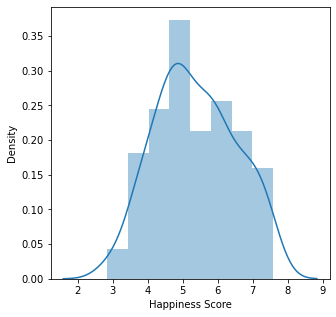

Column is not normalized


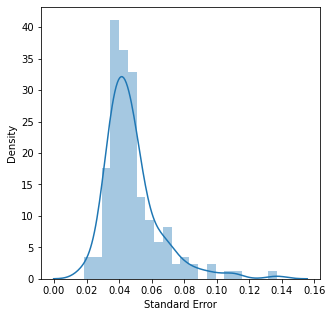

Column is not normalized


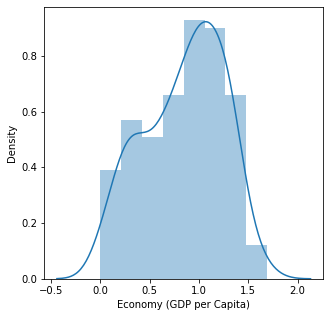

Column is not normalized


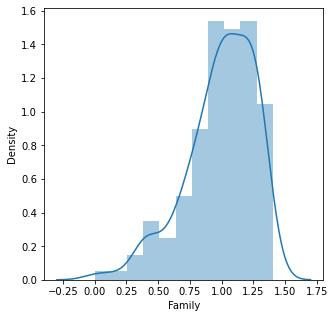

Column is not normalized


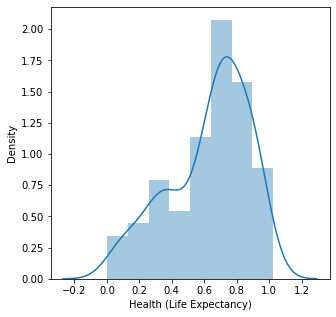

Column is not normalized


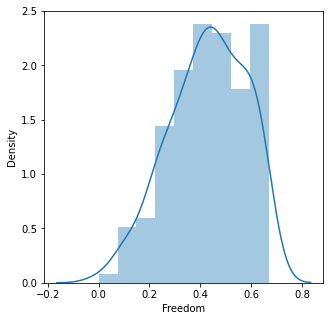

Column is not normalized


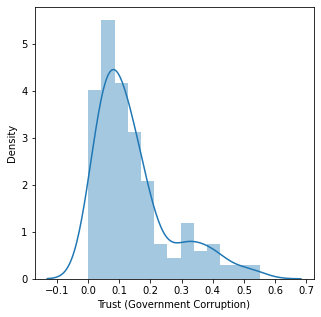

Column is not normalized


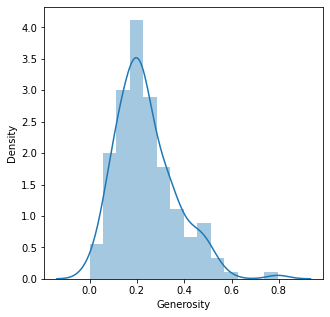

Column is not normalized


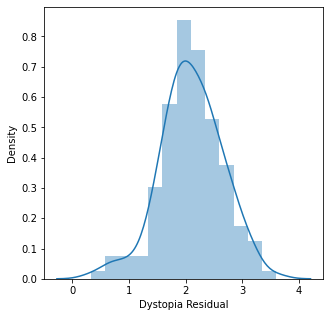

The distribution shows the data is not normalized and skewed


In [24]:
for i in column_list:
    plt.figure(figsize=(5,5))
    sns.distplot(df[i])
    print('Column is not normalized')
    plt.show()
print('The distribution shows the data is not normalized and skewed')

## Using Log transformation to normalize the data

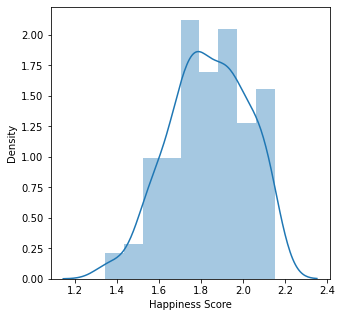

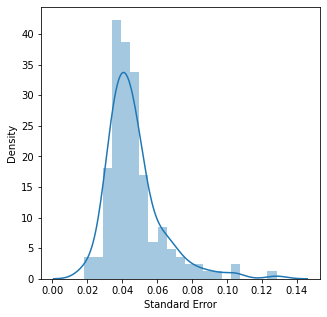

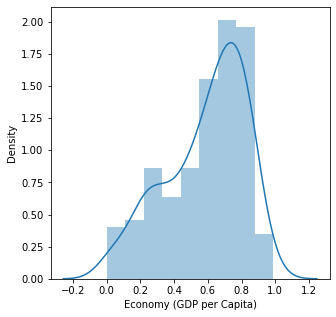

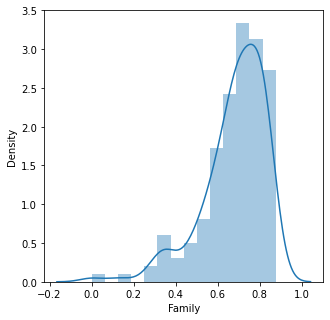

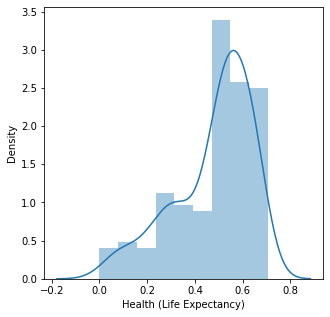

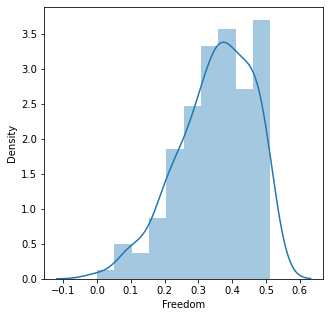

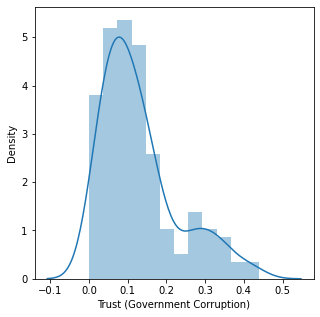

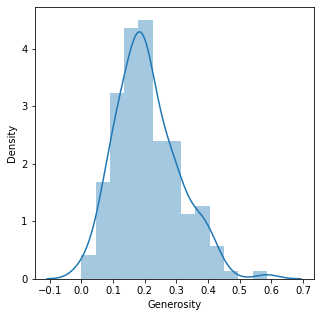

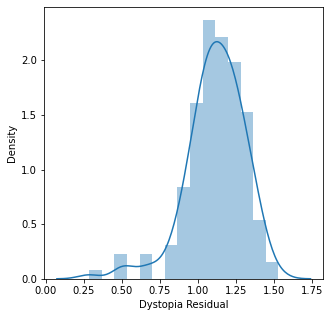

In [25]:
for i in column_list:
    df[i] = np.log(1+df[i])
    plt.figure(figsize=(5,5))
    sns.distplot(df[i])
    plt.show()

columns look normalized than before

## Checking for outliers

In [26]:
df.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [27]:
column_list = ['Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']

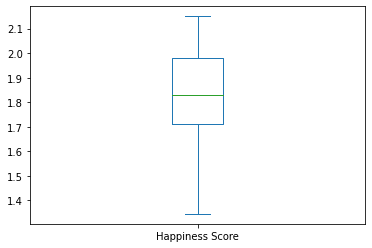

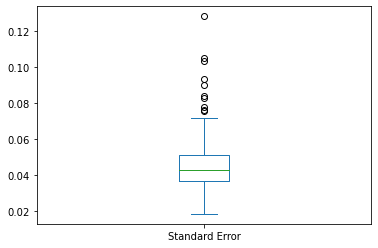

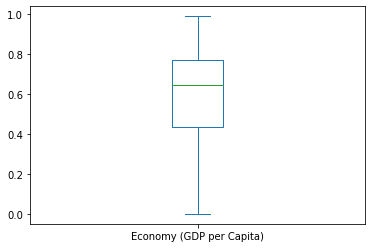

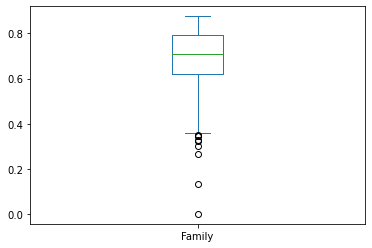

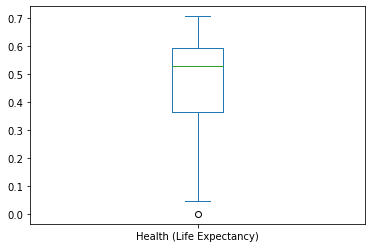

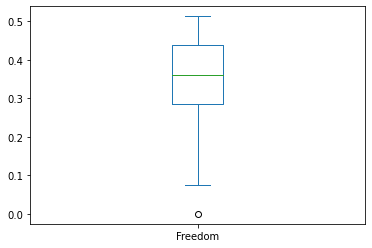

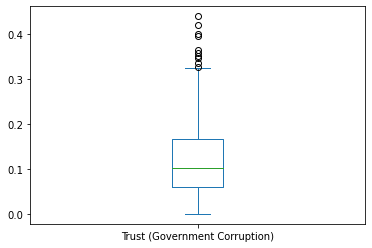

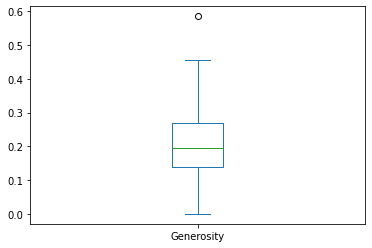

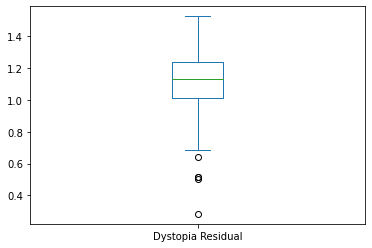

In [28]:
for columns in column_list:
    df[columns].plot.box()
    plt.show()

From the above plots, we can see that we have outliers in Standard Error,Family,Trust (Government Corruption),Generosity,Dystopia Residual.                          

Trust (Government Corruption) and Standard Error seems to have a lot of outliers 

## Removing outliers

In [29]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(158, 11)

In [30]:
threshold = 3
grtr_z = np.where(z>3)
grtr_z

(array([ 40,  64,  71, 111, 115, 128, 131, 147, 153, 153, 155, 157],
       dtype=int64),
 array([ 3,  3, 10,  7,  3,  9, 10,  5,  8, 10, 10,  5], dtype=int64))

##### We do not find any outliers being displayed in categorical cloumns so we apply z<3 to entire data

In [31]:
df_new = df[(z<3).all(axis=1)]
df_new

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,2.150249,0.033541,0.874014,0.854207,0.663425,0.510167,0.350502,0.259884,1.257716
1,58,9,2.147217,0.047685,0.833917,0.876397,0.666721,0.487825,0.132299,0.362070,1.308876
2,37,9,2.143238,0.032738,0.843926,0.858907,0.628417,0.500399,0.394451,0.293706,1.250486
3,105,9,2.142651,0.038066,0.899755,0.846276,0.634039,0.512662,0.311176,0.297872,1.242802
4,24,5,2.131441,0.034913,0.844275,0.842692,0.644813,0.490400,0.284856,0.377141,1.238884
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,1.537942,0.050132,0.382087,0.571629,0.141369,0.384350,0.164853,0.183696,0.882622
151,20,8,1.523226,0.042331,0.229619,0.616201,0.240001,0.332844,0.120730,0.196775,0.902167
152,0,7,1.520607,0.030374,0.277495,0.264554,0.264938,0.210374,0.092752,0.311228,1.082517
154,13,8,1.467874,0.035908,0.252042,0.302960,0.276950,0.395078,0.077054,0.167715,0.968230


## Percentage data loss 

In [32]:
percentage_loss = (158-147)/158*100
percentage_loss

6.962025316455696

## Splitting the data into x and y

In [53]:
X = df_new.drop('Happiness Score',axis=1)
X.shape

(147, 10)

In [54]:
y = df_new['Happiness Score']
y.shape

(147,)

## Scaling the model

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x

array([[ 1.26073018,  1.29177936, -0.87127711, ...,  2.30865454,
         0.60583414,  0.78379337],
       [-0.4191056 ,  1.29177936,  0.18481702, ...,  0.04702481,
         1.6872596 ,  1.09932538],
       [-0.87724263,  1.29177936, -0.93123236, ...,  2.76418224,
         0.96377035,  0.73919968],
       ...,
       [-1.68443644,  0.63128696, -1.10776563, ..., -0.36287285,
         1.14919651, -0.29676963],
       [-1.40082781,  0.96153316, -0.69458104, ..., -0.5255874 ,
        -0.36957996, -1.00164466],
       [-1.22629941,  0.96153316,  2.82439989, ..., -0.33052123,
        -0.239108  , -0.55071175]])

## Splitting the dataframe

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=43,test_size=0.3)

## Defining the Model

In [58]:
def train(model,x,y):
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    pred = model.predict(x_test)
    print('Model Report :')
    print('Mean Absolute Error :-',mean_absolute_error(y_test,pred))
    print('Mean_squared_error :-',mean_squared_error(y_test,pred))
    print('Root Mean Squared Error :-', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score :-', r2_score(y_test,pred))
    

## Model Tests

Model Report :
Mean Absolute Error :- 0.010985143439303277
Mean_squared_error :- 0.000337628017186666
Root Mean Squared Error :- 0.01837465692704672
r2_score :- 0.9888608911609251


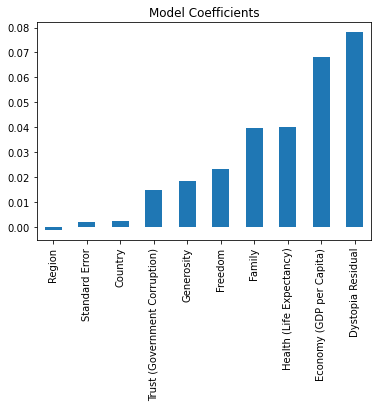

In [59]:
model = LinearRegression()

train(model,x,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind = 'bar',title = "Model Coefficients")
plt.show()

It is a very good model

Model Report :
Mean Absolute Error :- 0.010642702863491275
Mean_squared_error :- 0.00033145133791136504
Root Mean Squared Error :- 0.018205805060786655
r2_score :- 0.9890646737240103


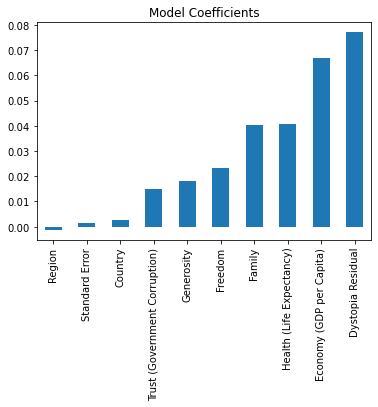

In [60]:
model = Ridge()

train(model,x,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind = 'bar',title = "Model Coefficients")
plt.show()

it is a very good model

Model Report :
Mean Absolute Error :- 0.14830219268358177
Mean_squared_error :- 0.030526447197156466
Root Mean Squared Error :- 0.17471819366384392
r2_score :- -0.007136257923165079


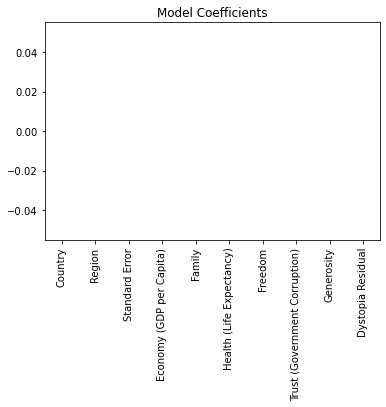

In [41]:
model = Lasso()

train(model,x,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind = 'bar',title = "Model Coefficients")
plt.show()

Negitive r2 score represents the model is worst than mean model or base model

Model Report :
Mean Absolute Error :- 0.08549225260064477
Mean_squared_error :- 0.011519098481748695
Root Mean Squared Error :- 0.10732706313762944
r2_score :- 0.6199589927832332


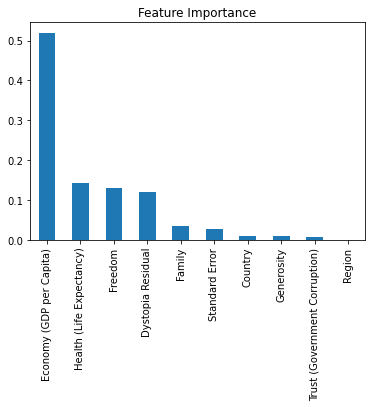

In [42]:
model = DecisionTreeRegressor()

train(model,x,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind = 'bar',title = "Feature Importance")
plt.show()

It is a good model 

Model Report :
Mean Absolute Error :- 0.03620043311129087
Mean_squared_error :- 0.0025749166123380553
Root Mean Squared Error :- 0.05074363617576154
r2_score :- 0.9150477006162739


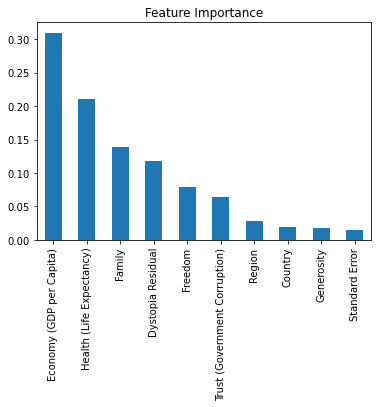

In [43]:
model = ExtraTreesRegressor()

train(model,x,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind = 'bar',title = "Feature Importance")
plt.show()

It is a very good Model

Model Report :
Mean Absolute Error :- 0.04742833646321654
Mean_squared_error :- 0.004102042416204928
Root Mean Squared Error :- 0.0640471889797275
r2_score :- 0.8646643802923925


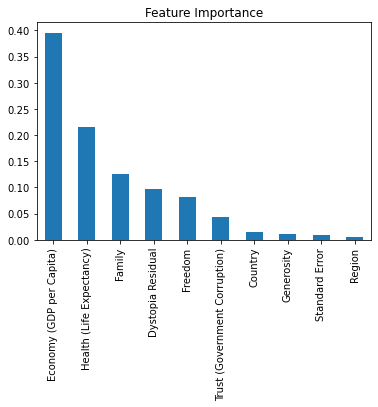

In [44]:
model = RandomForestRegressor()

train(model,x,y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind = 'bar',title = "Feature Importance")
plt.show()

It is a good model

From the above graphs we see that the Linear regression gives the highest r2 Score and can be used for model.

# Models with outliers

In [45]:
X = df.drop('Happiness Score',axis=1)
X.shape

(158, 10)

In [46]:
y = df['Happiness Score']
y.shape

(158,)

## Scalling Model with outliers

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x

array([[ 1.23877001,  1.30025593, -0.81564478, ...,  2.24501064,
         0.52680978,  0.74747727],
       [-0.44946522,  1.30025593,  0.06483715, ...,  0.03377212,
         1.56369393,  1.01288129],
       [-0.90989302,  1.30025593, -0.86563039, ...,  2.69038876,
         0.87000346,  0.7099681 ],
       ...,
       [ 1.26069514, -0.37544095,  0.14254239, ...,  0.44787992,
         1.81137234, -4.30336893],
       [-1.26069514,  0.96511655,  2.26549801, ..., -0.33536184,
        -0.28333124, -0.37501753],
       [ 1.37032081,  0.96511655,  1.14923184, ..., -0.27395059,
        -0.54482432, -0.88603452]])

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=43,test_size=0.3)

In [49]:
lr = LinearRegression()
rd = Ridge()
ls = Lasso()
dtc = DecisionTreeRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()

models = [lr,rd,ls,dtc,rf,et]

In [50]:
def train(model,x,y):
    for model in models:
        print(model)
        model.fit(x_train,y_train)
        model.score(x_train,y_train)
        pred = model.predict(x_test)
        print('Model Report :')
        print('Mean Absolute Error :-',mean_absolute_error(y_test,pred))
        print('Mean_squared_error :-',mean_squared_error(y_test,pred))
        print('Root Mean Squared Error :-', np.sqrt(mean_squared_error(y_test,pred)))
        print('r2_score :-', r2_score(y_test,pred))
        print()
        print()

In [51]:
train(models,x,y)

LinearRegression()
Model Report :
Mean Absolute Error :- 0.01326776174996403
Mean_squared_error :- 0.0004411084529259131
Root Mean Squared Error :- 0.021002582053783605
r2_score :- 0.9867007307937902


Ridge()
Model Report :
Mean Absolute Error :- 0.01344465733222564
Mean_squared_error :- 0.000449010665852699
Root Mean Squared Error :- 0.021189871775277428
r2_score :- 0.9864624817728498


Lasso()
Model Report :
Mean Absolute Error :- 0.14831917089281904
Mean_squared_error :- 0.03431316077785456
Root Mean Squared Error :- 0.18523811912739385
r2_score :- -0.034530078654590124


DecisionTreeRegressor()
Model Report :
Mean Absolute Error :- 0.09785754098490292
Mean_squared_error :- 0.014629679264493059
Root Mean Squared Error :- 0.12095321105490775
r2_score :- 0.5589201665748222


RandomForestRegressor()
Model Report :
Mean Absolute Error :- 0.04824574248629371
Mean_squared_error :- 0.004446833464303009
Root Mean Squared Error :- 0.06668458190843675
r2_score :- 0.8659294897554788


ExtraTr

##### From above we see that the scores for the model without outliers is higher than the one with

## Final Model Selected : Linear Regression without outliers


##### From the above graphs we see that the Ridge gives the highest r2 Score and can be used for model.

Model Report :
Mean Absolute Error :- 0.010642702863491275
Mean_squared_error :- 0.00033145133791136504
Root Mean Squared Error :- 0.018205805060786655
r2_score :- 0.9890646737240103


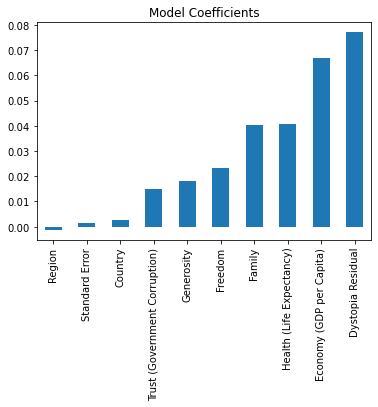

In [61]:
model = Ridge()

train(model,x,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind = 'bar',title = "Model Coefficients")
plt.show()